In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as sk
import seaborn as sns
import plotly.express as px

# Libraries required for Modelling and scoring
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

# Libraries to Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Librabry for Exporting Model
from joblib import dump

# To filter Warnings
import warnings

This notebook correlates with the report sent separately. 

The numbers of the main lines correspond to the table of contents that you can find in the report.

# 2. Data exploration

In [4]:
#Loading our data

data = pd.read_csv("dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# Checking the shape, 35 features and 4424 examples

print(data.shape)
data.describe()

(4424, 35)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
#Look for the type of features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

There are 7 floating point numbers, 29 integers and just 1 object column.

#### Missing values :

In [7]:
# missing values
total = data.isnull().sum().sort_values(ascending=False)

# show
pd.DataFrame(data={'Missing': total}).head(10)
#No missing values

,Missing
Marital status,0
Curricular units 2nd sem (enrolled),0
Curricular units 1st sem (enrolled),0
Curricular units 1st sem (evaluations),0
Curricular units 1st sem (approved),0
Curricular units 1st sem (grade),0
Curricular units 1st sem (without evaluations),0
Curricular units 2nd sem (credited),0
Curricular units 2nd sem (evaluations),0
International,0


In [8]:
# For curiosity and verifying if everything's normal

print(data["Target"].value_counts())

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


In [9]:
#Checking duplicated values 
print(data.duplicated().count())

4424


#### Understanding of features:

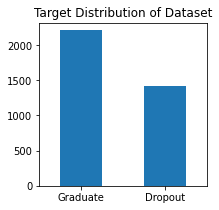

In [10]:
#looking at the histogram of the target

data = data[data.Target != "Enrolled"]
data["Target"].value_counts().plot(kind="bar", figsize=(3,3), title="Target Distribution of Dataset")
plt.xticks(rotation=0)
plt.show()

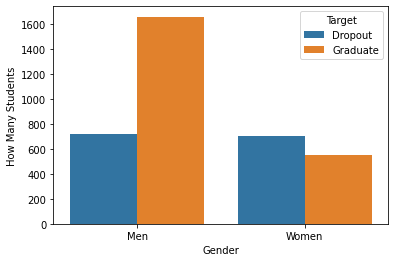

In [11]:
#Looking for the impact of the gender

sns.countplot(data=data, x='Gender', hue='Target', hue_order=['Dropout', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Men','Women'])
plt.ylabel('How Many Students')
plt.show()

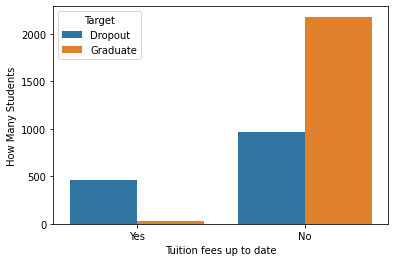

In [12]:
#Currius about the correlation of this features, we ploted it to analyse but everything look normal...

sns.countplot(data=data, x='Tuition fees up to date', hue='Target', hue_order=['Dropout', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Yes','No'])
plt.ylabel('How Many Students')
plt.show()

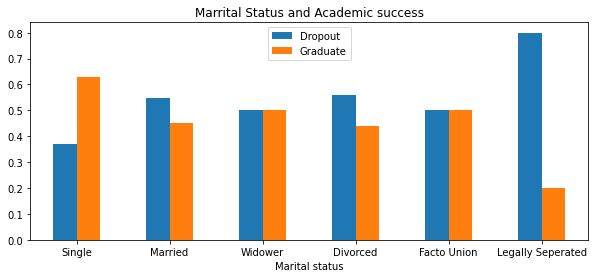

In [13]:
#How Marrital Status is affecting Academic Progress of student

pd.crosstab(data["Marital status"], data["Target"], normalize='index').plot(kind="bar", figsize=(10,4), title="Marrital Status and Academic success" )
plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'], rotation=0)
plt.legend(loc=9)
plt.show()

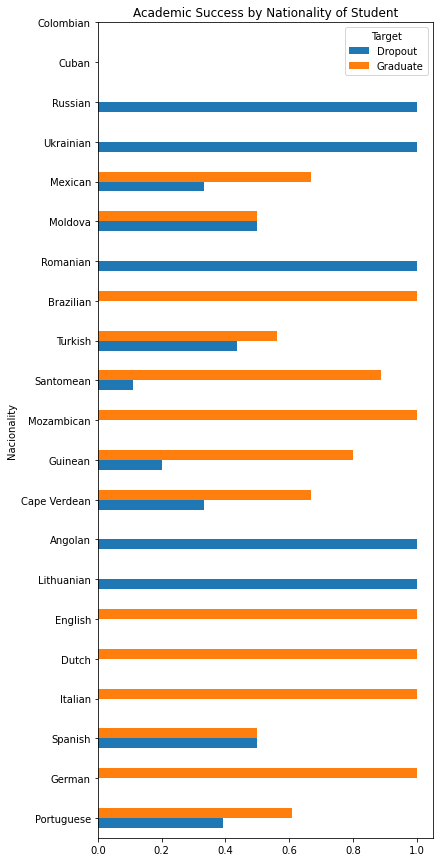

In [14]:
#How Nationality is affecting Academic Progress of student

pd.crosstab(data["Nacionality"], data["Target"], normalize='index').plot(kind="barh", figsize=(6,15), title="Academic Success by Nationality of Student")
plt.yticks(range(0,21), ['Portuguese', 'German', 'Spanish', 'Italian', 'Dutch', 'English', 'Lithuanian', 'Angolan', 'Cape Verdean', 'Guinean', 'Mozambican', 'Santomean', 'Turkish', 'Brazilian', 'Romanian', 'Moldova', 'Mexican', 'Ukrainian', 'Russian', 'Cuban', 'Colombian'])
plt.show()

#### Outliers:

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


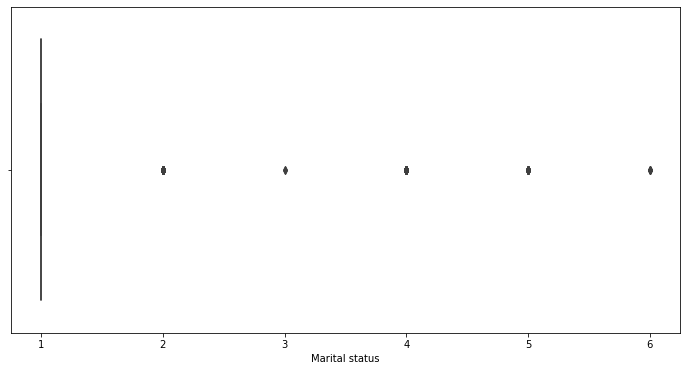

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


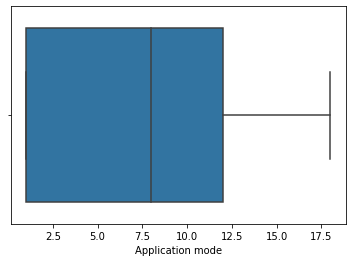

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


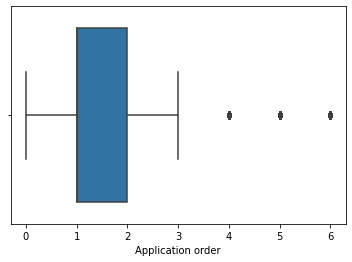

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


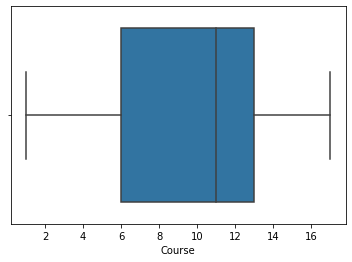

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


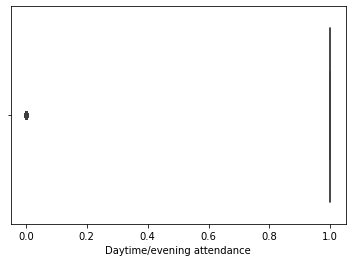

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


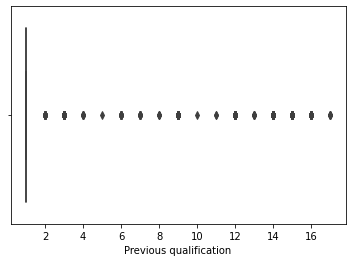

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


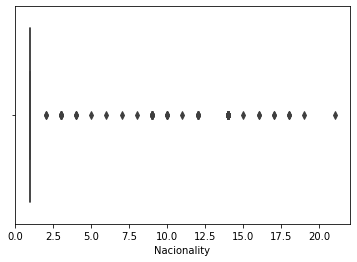

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


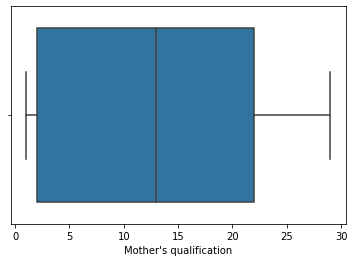

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


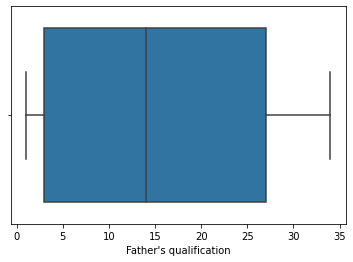

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


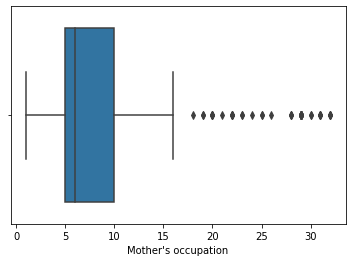

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


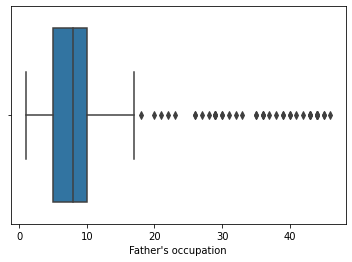

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


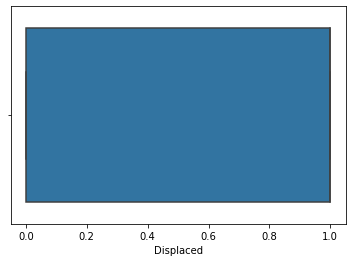

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


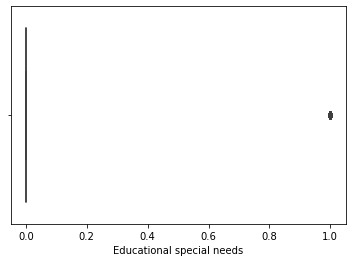

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


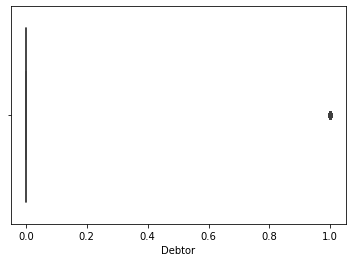

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


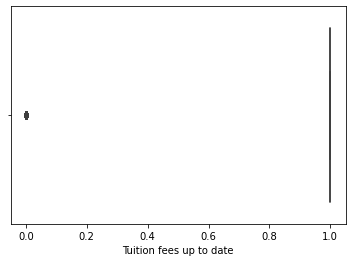

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


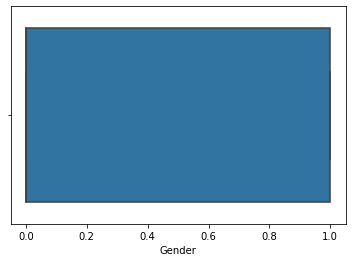

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


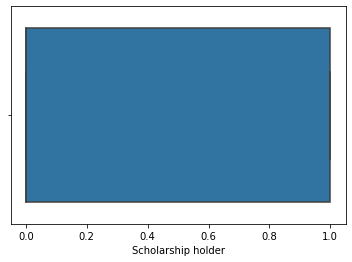

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


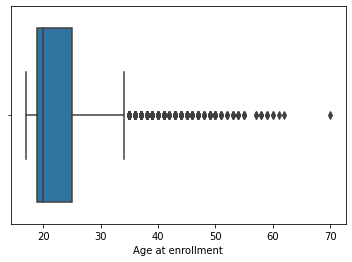

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


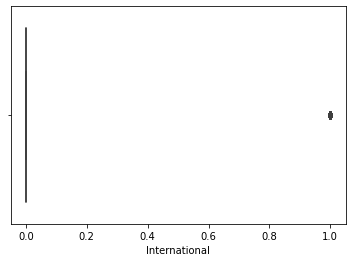

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


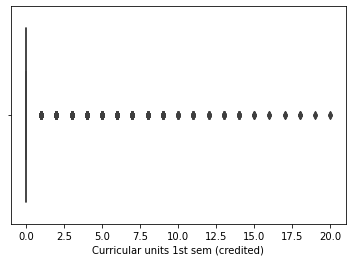

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


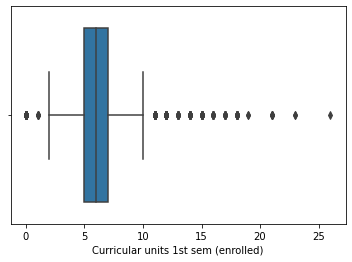

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


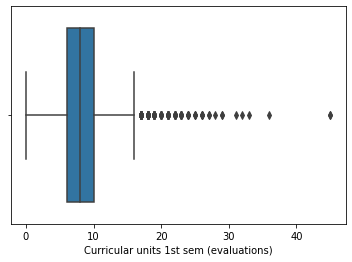

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


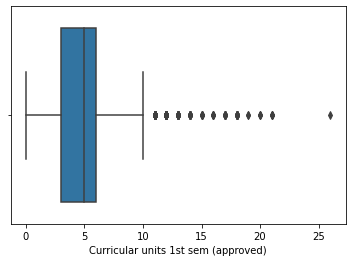

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


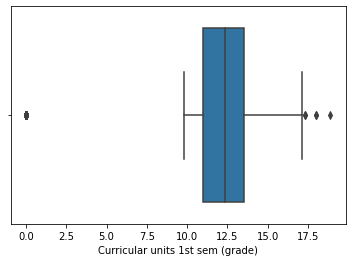

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


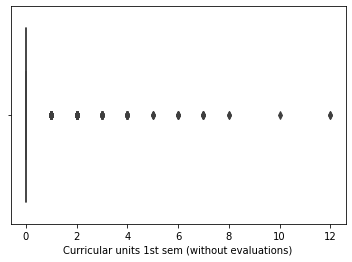

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


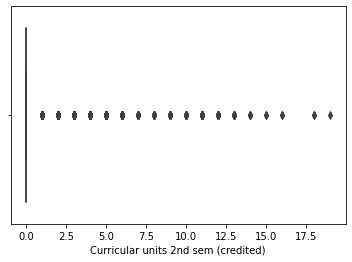

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


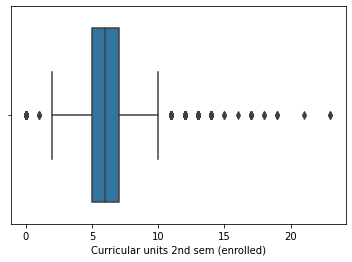

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


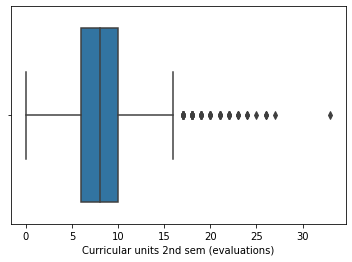

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


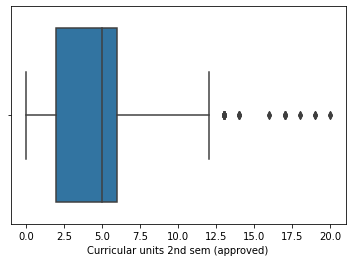

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


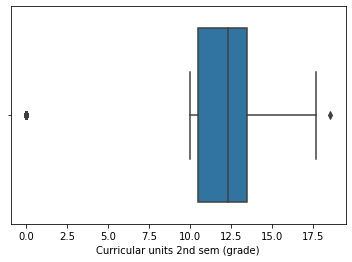

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


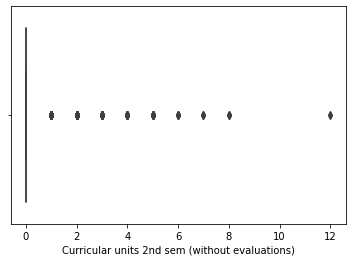

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


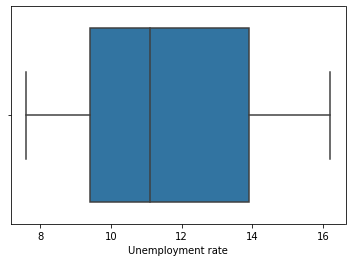

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


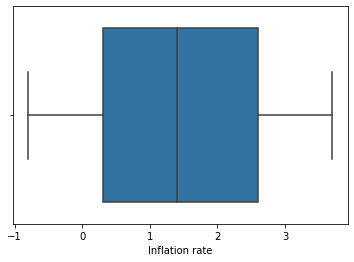

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


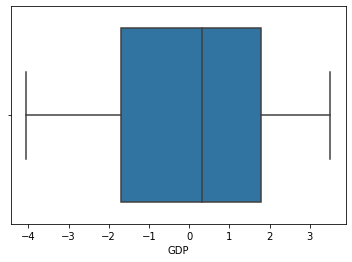

C:\Users\julie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


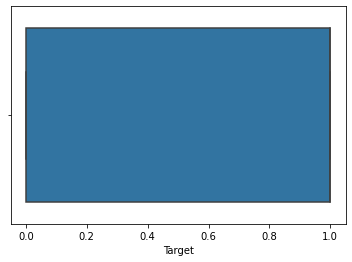

In [17]:
plt.figure(figsize = (12,6))

for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

<AxesSubplot:title={'center':'Age at enrl'}>

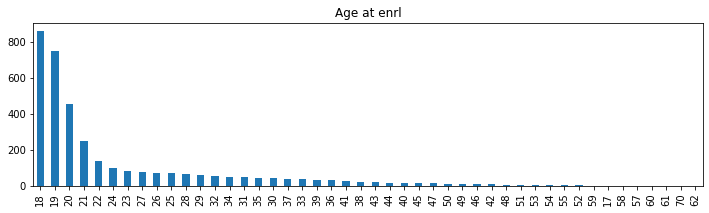

In [18]:
# We are skeptical about the the Age at Enrollement data, after looking at the boxplot, a lot of data were out the box...

data["Age at enrollment"].value_counts().plot(kind="bar", figsize=(12,3), title="Age at enrl")

<function matplotlib.pyplot.show(close=None, block=None)>

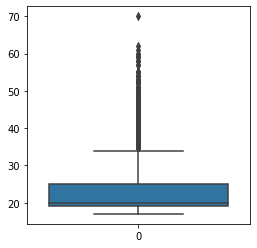

In [19]:
#Single boxplot

plt.figure(figsize =(4, 4))

sns.boxplot(data = data['Age at enrollment'])
plt.show


In [20]:
#Outlier treatment

data = data[(data['Age at enrollment']<35) & (data['Age at enrollment'] >1)]

<function matplotlib.pyplot.show(close=None, block=None)>

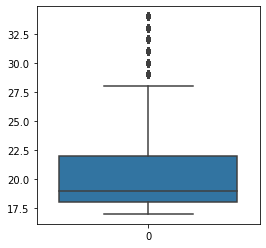

In [21]:
#Boxplot after treatment

plt.figure(figsize =(4, 4))

sns.boxplot(data = data['Age at enrollment'])
plt.show


In [23]:
#We lost more than a thousand of example. Weird..

data.shape

(3241, 35)

# 3- Data preprocessing

* Grouping of features into different categories:

In [15]:
data['Target'] = data['Target'].map({
    'Dropout' : 0,
    'Graduate': 1
})
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


#### We are going to check the correlation between many factors, Demographic, socio-economic , Macro and Academic Enrollment Data and Academic Data

In [16]:
# Demographic Data
demo_df = data[["Marital status", "Nacionality", "Displaced", "Gender", "Age at enrollment", "International", "Target"]]

# Socio Economic Data
sc_df = data[["Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder", "Target"]]

# Macro and Academic Enrollment Data
mae_df = data[['Unemployment rate', 'Inflation rate', 'GDP', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Target']]

# Academic Data
ac_df = data[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Target']]

#### Correlation matrix:

In [20]:
#Encoding our target variable whose the only categorical variable. We choosed to only keep the DropOut And Graduate results.
data['Target'] = data['Target'].map({
    'Dropout' : 0,
    'Graduate': 1
})
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,1


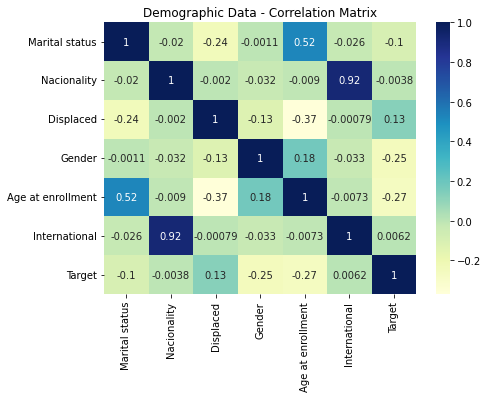

In [24]:
# Correlation Matrix for Demographic Data

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(demo_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Demographic Data - Correlation Matrix")
plt.show()

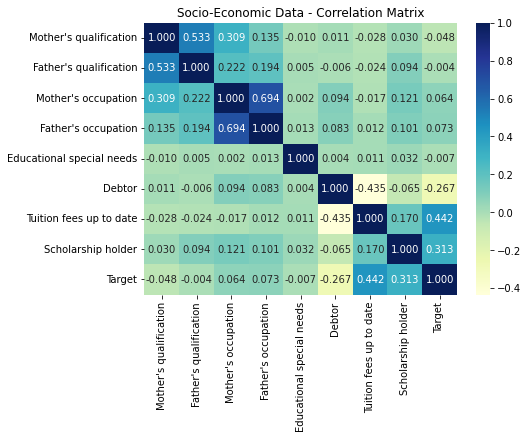

In [25]:
# Correlation Matrix for Socio-Economic Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(sc_df.corr(), annot=True, cmap="YlGnBu", fmt='.3f')
plt.title("Socio-Economic Data - Correlation Matrix")
plt.show()

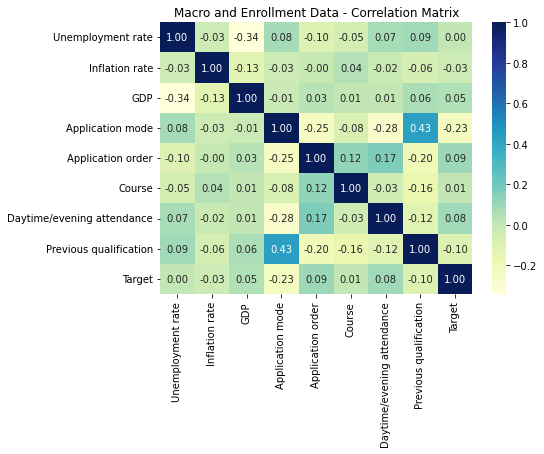

In [26]:
# Correlation Matrix for Macro and Academic enrollment Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(mae_df.corr(), annot=True, cmap="YlGnBu", fmt='.2f')
plt.title("Macro and Enrollment Data - Correlation Matrix")
plt.show()

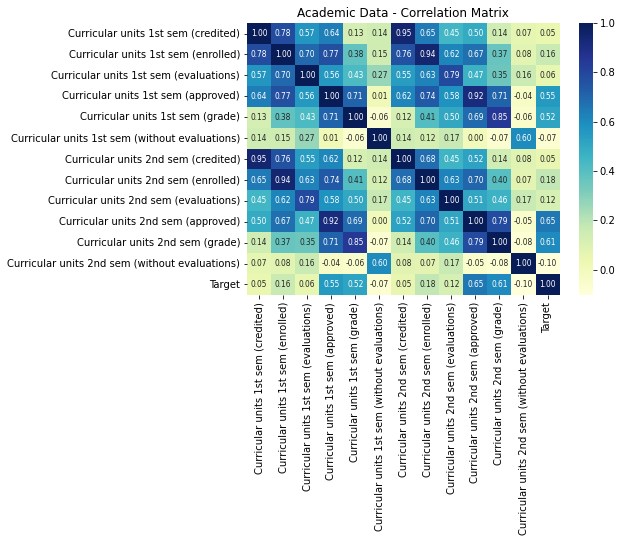

In [27]:
# Correlation Matrix for Academic Data
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(ac_df.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 7.5})
plt.title("Academic Data - Correlation Matrix")
plt.show()

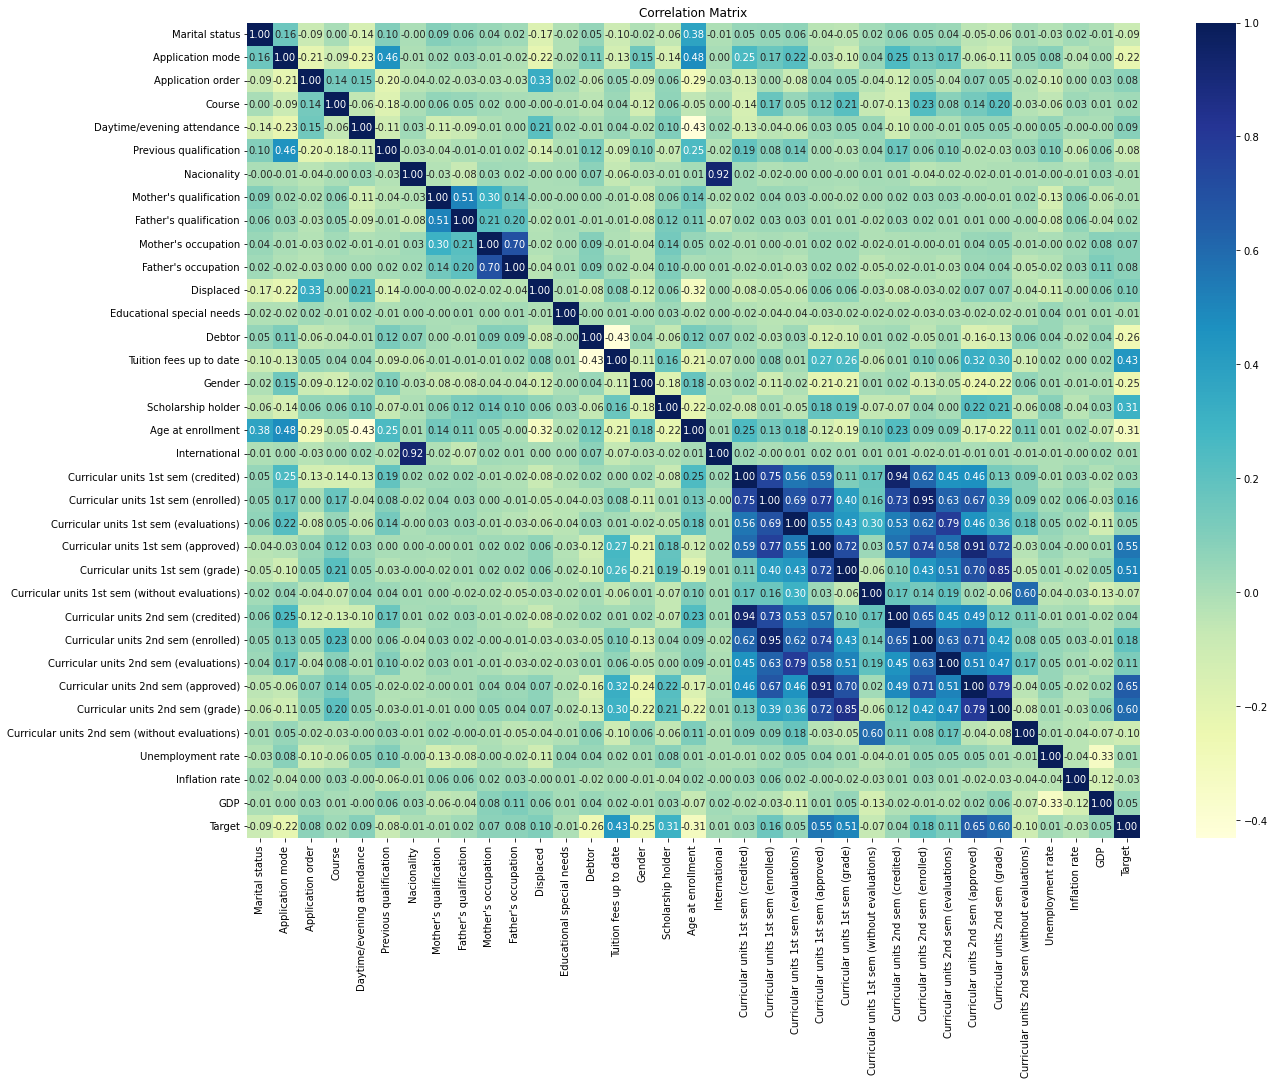

In [28]:
#general correlation matrix

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()

In [29]:
# dropping correlated features 

data.drop(data[['Nacionality',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 "Mother's occupation",]], axis=1, inplace=True)

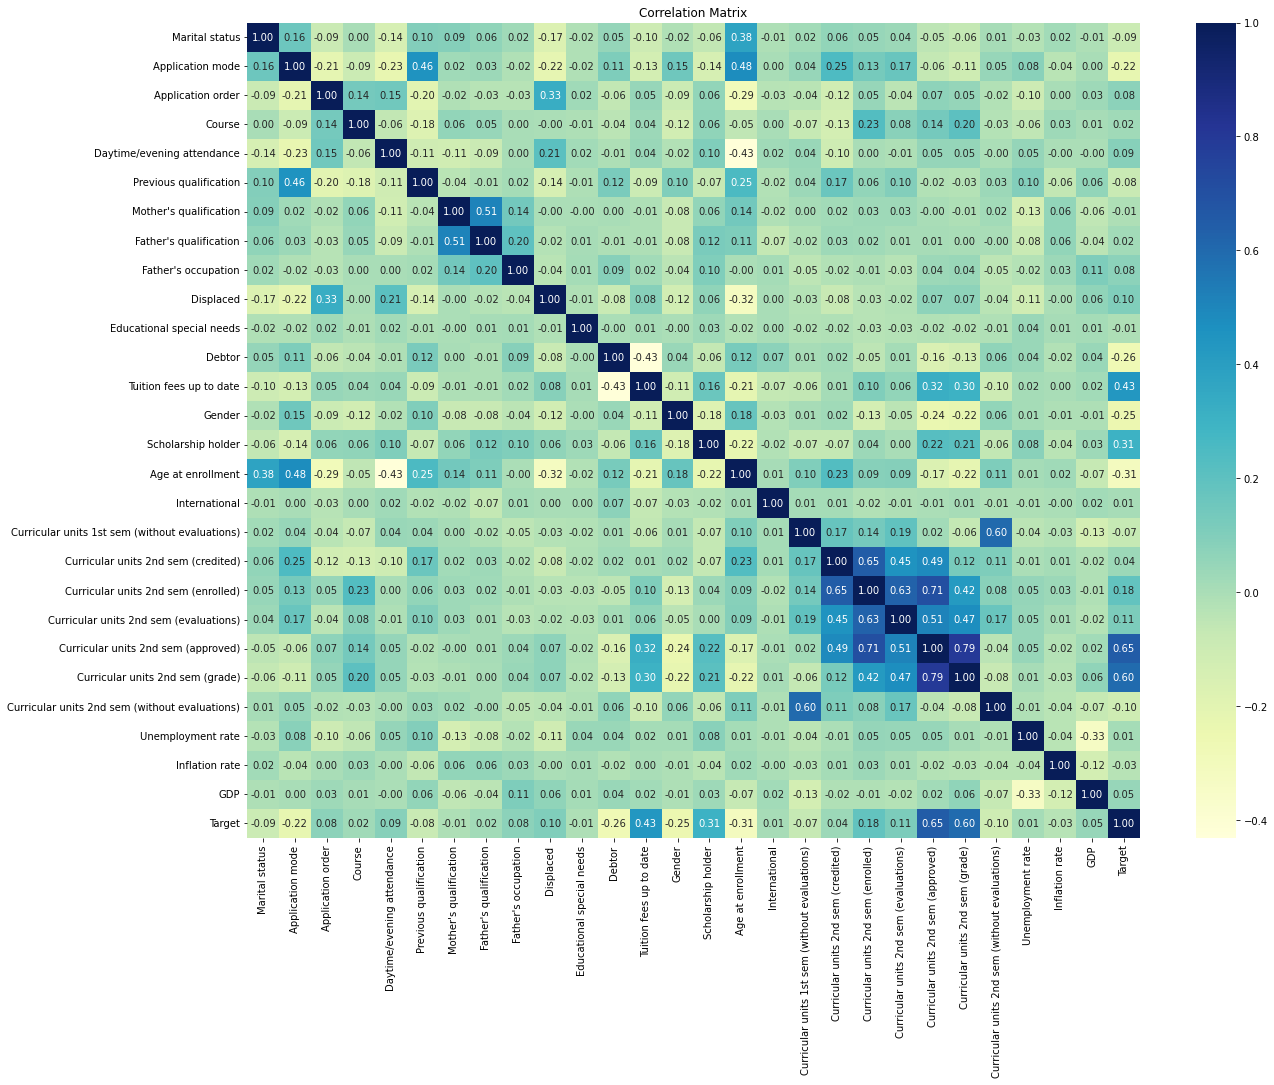

In [30]:
#general correlation matrix after the features extraction

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", fmt='.2f', annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()

# 4 - Prediction models

In [31]:
#splitting target and features

X = data.drop("Target", axis = 1)
y = data.Target

In [32]:
# Function who help us finding a good model for our classification prediction. Source : "TD Machine Learning E4 Esiee Paris"

def test_model(model_dict, X , y, cv):
    model_parameters = ["accuracy", "precision", "recall"]
    
    cv_score = {} # To append Scores of each Model
    
    warnings.filterwarnings("ignore") 
    
    np.random.seed(0)
    for name, model in model_dict.items():
        # enumerating through All Models in Dictionery
        cv_score[name] = {}
        for param in model_parameters:
            # Calculating Mean values for cross validation with each Parameter
            score = np.mean(cross_val_score(model, X, y, scoring=param, cv=cv))
            cv_score[name][param] = score 
    cv = pd.DataFrame(data=cv_score)
    return cv

In [33]:
#test of different model
model_dict = {"Logistic Regression" : LogisticRegression(),
              "KNN - Classifier" : KNeighborsClassifier(),
              "Random Forest Classifier" : RandomForestClassifier(),
              "Decision Tree" : DecisionTreeClassifier()}

test_model(model_dict, X, y, cv = 8)

,Logistic Regression,KNN - Classifier,Random Forest Classifier,Decision Tree
accuracy,0.904655,0.825055,0.904963,0.844177
precision,0.900070,0.810888,0.895172,0.883554
recall,0.956237,0.945063,0.954301,0.882349


### For splitting categories :


In [34]:
#splitting target and features from Academic data

X_ac = ac_df.drop("Target", axis = 1)
y_ac = ac_df.Target

In [35]:
#splitting target and features from demographic data

X_demo = demo_df.drop("Target", axis = 1)
y_demo = demo_df.Target

In [36]:
#splitting target and features from SocioEco data

X_sc = sc_df.drop("Target", axis = 1)
y_sc = sc_df.Target

In [37]:
#splitting target and features from macroEco data

X_mae = mae_df.drop("Target", axis = 1)
y_mae = mae_df.Target

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [39]:
X_train_ac,X_test_ac,y_train_ac,y_test_ac = train_test_split(X_ac,y_ac,test_size=0.2)

In [40]:
X_train_demo,X_test_demo,y_train_demo,y_test_demo = train_test_split(X_demo,y_demo,test_size=0.2)

In [41]:
X_train_sc,X_test_sc,y_train_sc,y_test_sc = train_test_split(X_sc,y_sc,test_size=0.2)

In [42]:
X_train_mae,X_test_mae,y_train_mae,y_test_mae = train_test_split(X_mae,y_mae,test_size=0.2)

### Train models :

In [43]:
#We choose LogisticRegression according to our results above..

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
model1 = LogisticRegression()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

print("precision : ",accuracy_score(y_test,y_pred))

score = cross_val_score(model1 , X_train,y_train, cv = 10)


print ("Cross validation : " ,score.mean())

precision :  0.8983050847457628
Cross validation :  0.9058657558657558


In [44]:
#Train with academic data only

model0= LogisticRegression()

model0.fit(X_train_ac,y_train_ac)
y_pred_ac = model0.predict(X_test_ac)

print("precision : ",accuracy_score(y_test_ac,y_pred_ac))

score_ac = cross_val_score(model0 , X_train_ac,y_train_ac, cv = 10)


print ("Cross validation : " ,score_ac.mean())

precision :  0.8994490358126722
Cross validation :  0.8819089939566298


In [45]:
#Train with Demographic data only

model2 = LogisticRegression()

model2.fit(X_train_demo,y_train_demo)
y_pred_demo = model2.predict(X_test_demo)

print("precision : ",accuracy_score(y_test_demo,y_pred_demo))

score_demo = cross_val_score(model2 , X_train_demo,y_train_demo, cv = 10)


print ("Cross validation : " ,score_demo.mean())

precision :  0.7162534435261708
Cross validation :  0.6683777698779477


In [46]:
#Train with SocioEconomic data only

model3 = LogisticRegression()

model3.fit(X_train_sc,y_train_sc)
y_pred_sc = model3.predict(X_test_sc)

print("precision : ",accuracy_score(y_test_sc,y_pred_sc))

score_sc = cross_val_score(model3 , X_train_sc,y_train_sc, cv = 10)


print ("Cross validation : " ,score_sc.mean())

precision :  0.7079889807162535
Cross validation :  0.7427752103329779


In [47]:
#Train with MacroEconomic data only

model4 = LogisticRegression()

model4.fit(X_train_mae,y_train_mae)
y_pred_mae = model4.predict(X_test_mae)

print("precision : ",accuracy_score(y_test_mae,y_pred_mae))

score_mae = cross_val_score(model4 , X_train_mae,y_train_mae, cv = 10)


print ("Cross validation : " ,score_mae.mean())

precision :  0.6115702479338843
Cross validation :  0.6177722478966703
